In [1]:
from scapy.all import *
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
file_packages = rdpcap('analisis_paquetes.pcap')
scapy_packages = sniff(count=10)
packages = scapy_packages + file_packages
packages


<Sniffed+analisis_paquetes.pcap: TCP:7 UDP:65 ICMP:0 Other:0>

In [22]:
packet_info = []
for pack in packages:
    n_df = {}
    if 'IP' in pack:
        n_df['src address'] = pack['IP'].src
        n_df['dst address'] = pack['IP'].dst
        if pack.haslayer('TCP'):
            n_df['src port'] = pack['TCP'].sport
            n_df['dst port'] = pack['TCP'].dport
            n_df['payload len'] = len(pack['TCP'].payload)
        elif pack.haslayer('UDP'):
            n_df['src port'] = pack['UDP'].sport
            n_df['dst port'] = pack['UDP'].dport
            n_df['payload len'] = len(pack['UDP'].payload)

        packet_info.append(n_df)

df = pd.DataFrame(packet_info)
df.head()

,src address,dst address,src port,dst port,payload len
0,192.168.0.111,20.189.173.6,57809,443,0
1,20.189.173.6,192.168.0.111,443,57809,0
2,192.168.0.111,20.189.173.6,57809,443,0
3,192.168.0.111,20.189.173.6,57809,443,517
4,192.168.0.10,224.0.0.251,5353,5353,366


In [32]:
inciso_a = df["src address"].value_counts().idxmax()
print("Muestre cual es la IP origen más frecuente:", inciso_a)

inciso_b = df["dst address"].value_counts().idxmax()
print("Muestre cual es la IP destino más frecuente:", inciso_b)


inciso_c = df[df["src address"] == inciso_a]
print("¿A qué IPs se comunica la IP del inciso a?: ", inciso_c["dst address"].unique())
print("¿A qué puertos destino se comunica la IP del inciso a?: ", inciso_c["dst port"].unique())



inciso_d = df[df["dst address"] == inciso_b]
print("¿A qué puertos origen se comunica la IP del inciso b?: ", inciso_c["src port"].unique())

print("Indique el propósito de los puertos que más aparece en los incisos d y e")
print("Puerto 53: DNS, es el puerto por defecto para el servicio DNS")

Muestre cual es la IP origen más frecuente: 10.1.10.53
Muestre cual es la IP destino más frecuente: 10.1.10.53
¿A qué IPs se comunica la IP del inciso a?:  ['84.54.22.33' '75.75.75.75']
¿A qué puertos destino se comunica la IP del inciso a?:  [53]
¿A qué puertos origen se comunica la IP del inciso b?:  [   53 15812 23903]


Text(0.5, 0, 'Suma de los payloads enviados')

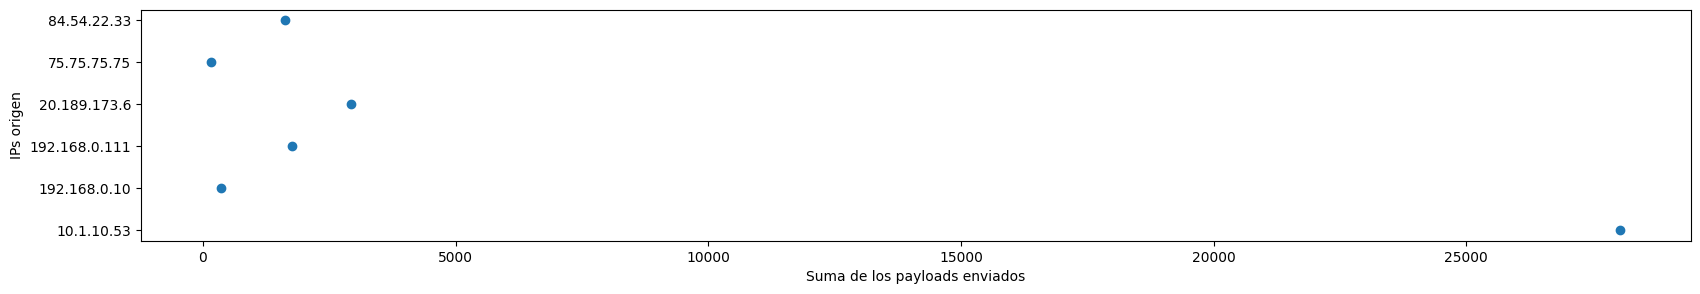

In [54]:
graph = df.groupby(['src address']).sum()
plt.scatter(graph['payload len'], graph.index)
plt.ylabel('IPs origen')
plt.xlabel('Suma de los payloads enviados')



Text(0.5, 0, 'Suma de los payloads recibidos')

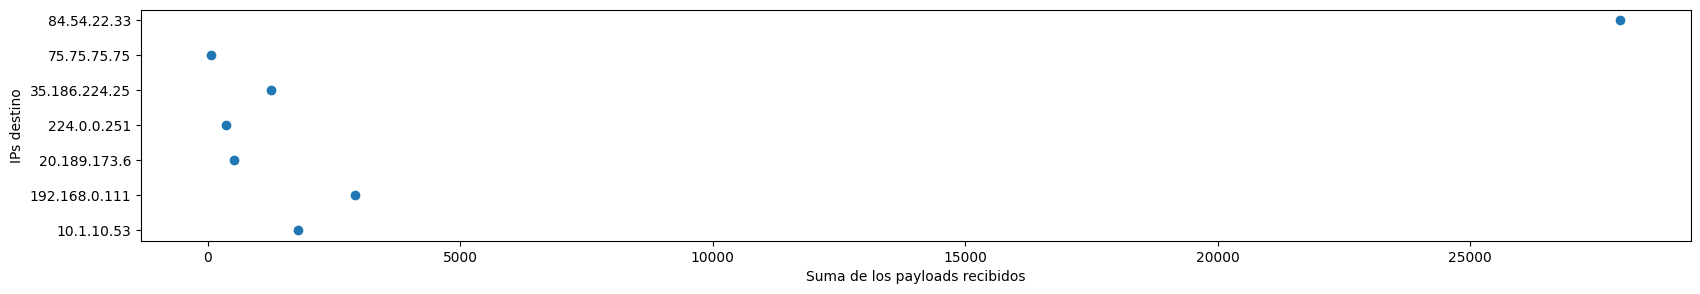

In [55]:
graph = df.groupby(['dst address']).sum()
plt.scatter(graph['payload len'], graph.index)
plt.ylabel('IPs destino')
plt.xlabel('Suma de los payloads recibidos')



Text(0.5, 0, 'Suma de los payloads enviados')

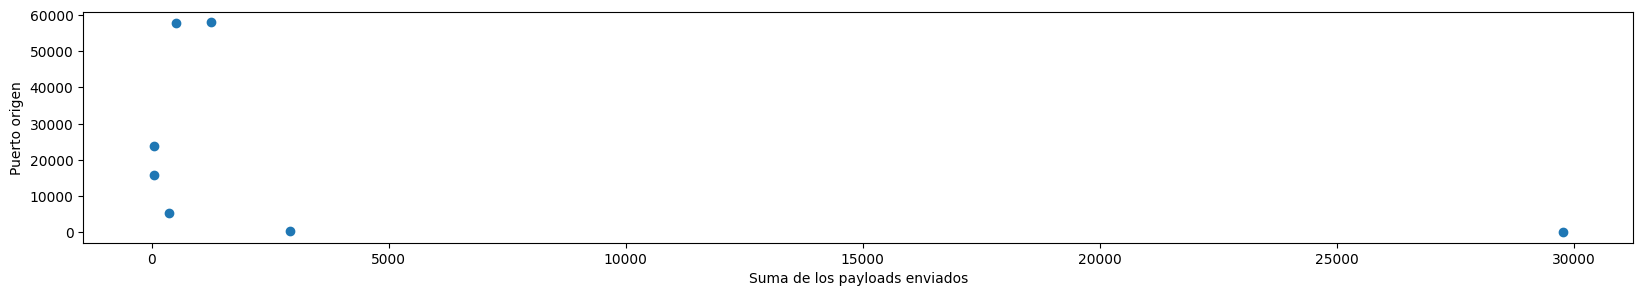

In [56]:
graph = df.groupby('src port').sum()
plt.scatter(graph['payload len'], graph.index)
plt.ylabel('Puerto origen')
plt.xlabel('Suma de los payloads enviados')

Text(0.5, 0, 'Suma de los payloads')

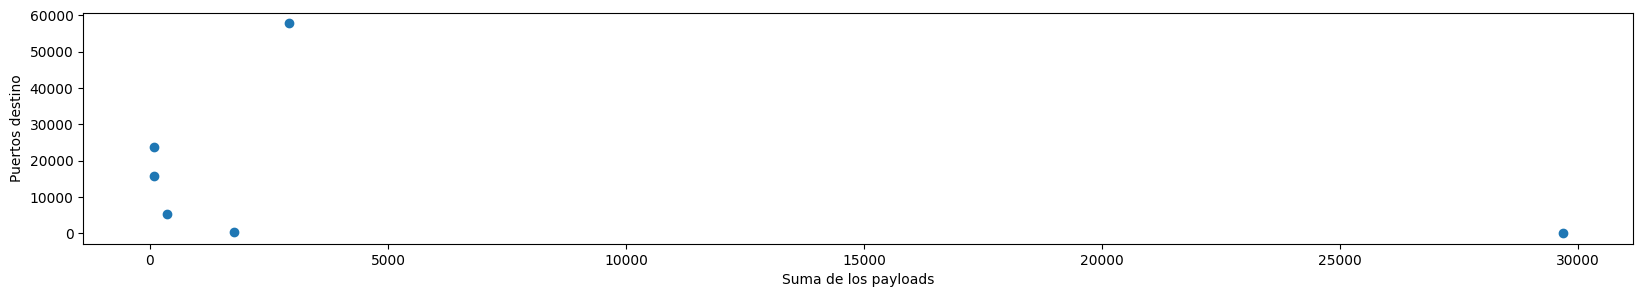

In [57]:
graph = df.groupby('dst port').sum()
plt.scatter(graph['payload len'], graph.index)
plt.ylabel('Puertos destino')
plt.xlabel('Suma de los payloads')

In [65]:
df2 = df[df["src address"] == inciso_a]
payload_filter = df2['payload len'].unique()
mpf = max(payload_filter)
payload = None
df2[df2["payload len"] == mpf]
for package in file_packages:
    if package.haslayer('TCP'):
        if  payload == None and len(package['TCP'].payload) == max(payload_filter):
            payload = package[Raw].load
    elif package.haslayer('UDP'):
        if payload == None and len(package['UDP'].payload) == max(payload_filter):
            payload = package[Raw].load

payload.decode('utf-8')


'���<>}���%��R�A\x08��t���\\\x07@c�-�G�9�u9���E%wq��\x0f\x0e��o��c�.�8���g���\n!��.�|���\x04�p�&:�b=\x16\x0f\x14c��d�<��W�\x08\x1b喎M\x1e��Rޗ��\\2頋B�����^"+#m>r\x0cR\x16\x08)\x1f(,��\x1d9\x07�s\x1f�\r��R�\'\x18~��\x07��^(:�ѥ�Q�\x19�v:"��g���tX"�YZG����pǤ�\x0br�+�F��j\x05\u2e7dg��\x1cO1��%݇ލ��"LI��$�\x07�%�.b]3!�E�k*\x1d\x06�=\x04�@@�\x14��}�5�`�����)��ɜd\x11��\x14=ի\x162�cȰ�\x07g\x15���K&\x11�b��\x02����<@3\x11�TD;��%u�L�.,.}�K��\\}��m1��Ej��\x15�]�������\r͡�L�:ߴ�b��;��1�v�\x10�VR��"kq���\x03�ǧ7\x03���5�0)����\x1a~��\x1f\x0f7ľ3v���C�\x1c}j�&�B�y�/\x00BA\x7f��$���\x10XjSI����S�\\t�{�P�i\x02�焀�B����ϱ�\x1eQ�~�q���\x03\x07�kƱ��K/�4�)R*\x15�c�������U��҇\x08�"��\x14�\x18���~\x16��C3�'

In [66]:
print("¿encuentra algún dato que no haga sentido que se envié a través del puerto explicado en el inciso f?")
print("Si, se pueden observar caracterres que no son bytes, por ejemplo: 0x0d 0x0a 0x0d 0x0a")

¿encuentra algún dato que no haga sentido que se envié a través del puerto explicado en el inciso f?
Si, se pueden observar caracterres que no son bytes, por ejemplo: 0x0d 0x0a 0x0d 0x0a


In [67]:
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import math
import numpy as np

In [69]:
train_df = pd.read_csv("Train_data.csv")
test_df = pd.read_csv("Test_data.csv")
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [71]:

ndf = train_df.select_dtypes(include=np.number)
ndf["isNormal"] = train_df["class"].apply(lambda x: 0 if x == 'normal' else 1)
ndf.astype(np.number)
ndf.head()

c:\Users\oscar\Documents\Universidad\Security Data Science\SDS-LAB05\venv\Lib\site-packages\pandas\core\dtypes\common.py:1691: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)
c:\Users\oscar\Documents\Universidad\Security Data Science\SDS-LAB05\venv\Lib\site-packages\pandas\core\dtypes\common.py:1691: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)
c:\Users\oscar\Documents\Universidad\Security Data Science\SDS-LAB05\venv\Lib\site-packages\pandas\core\dtypes\common.py:1691: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,isNormal
0,0,491,0,0,0,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,146,0,0,0,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,0,0,0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,232,8153,0,0,0,0,0,1,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,199,420,0,0,0,0,0,1,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


In [75]:

X = ndf.drop(['isNormal'], axis=1)
Y = ndf['isNormal']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)
model = KNeighborsClassifier()
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print ('\nAccuracy:', accuracy_score(y_test, y_pred))
print ("Precision:", precision_score(y_test, y_pred))
print ("Recall: ", recall_score(y_test, y_pred))
print ("F1: ", f1_score(y_test, y_pred))



Accuracy: 0.9850489547499338
Precision: 0.9846197664483053
Recall:  0.9832195676905574
F1:  0.9839191689198804


In [76]:
pca = PCA(n_components=12, random_state=42)
pca_X = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(pca_X, Y, test_size=0.30, random_state=42)
model = KNeighborsClassifier()
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print ('\nAccuracy:', accuracy_score(y_test, y_pred))
print ("Precision:", precision_score(y_test, y_pred))
print ("Recall: ", recall_score(y_test, y_pred))
print ("F1: ", f1_score(y_test, y_pred))


Accuracy: 0.9849166446149775
Precision: 0.9843394077448747
Recall:  0.9832195676905574
F1:  0.9837791690381331


#### Al comparar ambos modelos, podemos observar que tienen un rendimiento similar, sin embargo, el modelo sin PCA tiene un mejor rendimiento en las métricas de Precision y Recall, por lo que se puede concluir que es mejor no utilizar PCA para este caso.